# CIFAR-10 Deep Learning Project Tutorial

This tutorial demonstrates how to apply software design principles in a deep learning project using the CIFAR-10 dataset. We will cover the following steps:

- Data loading and preprocessing
- Building a modular Convolutional Neural Network (CNN)
- Training the model with experiment tracking using MLflow
- Evaluating the model

The project is organized with best practices in mind, making it easy to integrate Docker containerization and CI/CD pipelines later on.

In [1]:
from src import data_loader, model, train, evaluate, utils
import matplotlib.pyplot as plt

utils.set_seed(40)

x_train, y_train, x_test, y_test = data_loader.load_cifar10_data()
print('Training data shape:', x_train.shape)
print('Test data shape:', x_test.shape)

Seed set to 40
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


## Visualizing Some Sample Images

Let's visualize a few samples from the training set to understand the data better.

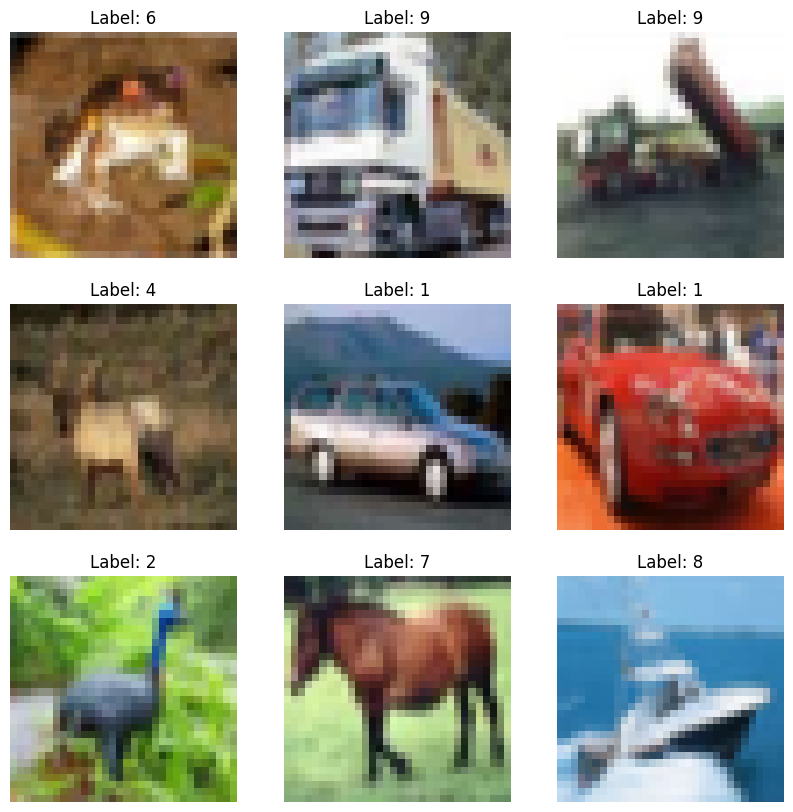

In [2]:
import numpy as np

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.show()

## Building the CNN Model

Next, we create a simple Convolutional Neural Network using our modular design. The model is defined in `src/model.py` and can be easily inspected and modified.

In [3]:
# Create the CNN model and print its summary
cnn_model = model.create_cnn_model()
cnn_model.summary()

/Users/hp/Desktop/CodeDemo/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model with MLflow

We now train the model. The training script in `src/train.py` uses MLflow to automatically log parameters, metrics, and the model artifact. This makes tracking experiments and reproducibility much easier.

In [4]:
# Train the model (this will also log the experiment with MLflow)
history = train.train()
print('Training complete!')

Seed set to 42


Epoch 1/10
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2635 - loss: 1.9579

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.2638 - loss: 1.9572 - val_accuracy: 0.4930 - val_loss: 1.4474
Epoch 2/10
1245/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4317 - loss: 1.5524

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4318 - loss: 1.5522 - val_accuracy: 0.5536 - val_loss: 1.2580
Epoch 3/10
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4921 - loss: 1.4000

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.4922 - loss: 1.3999 - val_accuracy: 0.6024 - val_loss: 1.1594
Epoch 4/10
1243/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5307 - loss: 1.3020

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5307 - loss: 1.3019 - val_accuracy: 0.6254 - val_loss: 1.0926
Epoch 5/10
1243/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5536 - loss: 1.2456

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.5536 - loss: 1.2455 - val_accuracy: 0.6384 - val_loss: 1.0433
Epoch 6/10
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5786 - loss: 1.1798

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5786 - loss: 1.1798 - val_accuracy: 0.6433 - val_loss: 1.0334
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5924 - loss: 1.1391

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5924 - loss: 1.1390 - val_accuracy: 0.6531 - val_loss: 1.0123
Epoch 8/10
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6073 - loss: 1.0959

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6073 - loss: 1.0959 - val_accuracy: 0.6630 - val_loss: 0.9907
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6144 - loss: 1.0567 - val_accuracy: 0.6621 - val_loss: 1.0071
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6297 - loss: 1.0272 - val_accuracy: 0.6606 - val_loss: 1.0108
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Training complete!


## Evaluating the Model

After training, we evaluate the model using our evaluation script in `src/evaluate.py`. This cell will load the saved model and display performance metrics along with sample predictions.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6647 - loss: 1.0035
Test Loss: 1.000370740890503
Test Accuracy: 0.6635000109672546
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


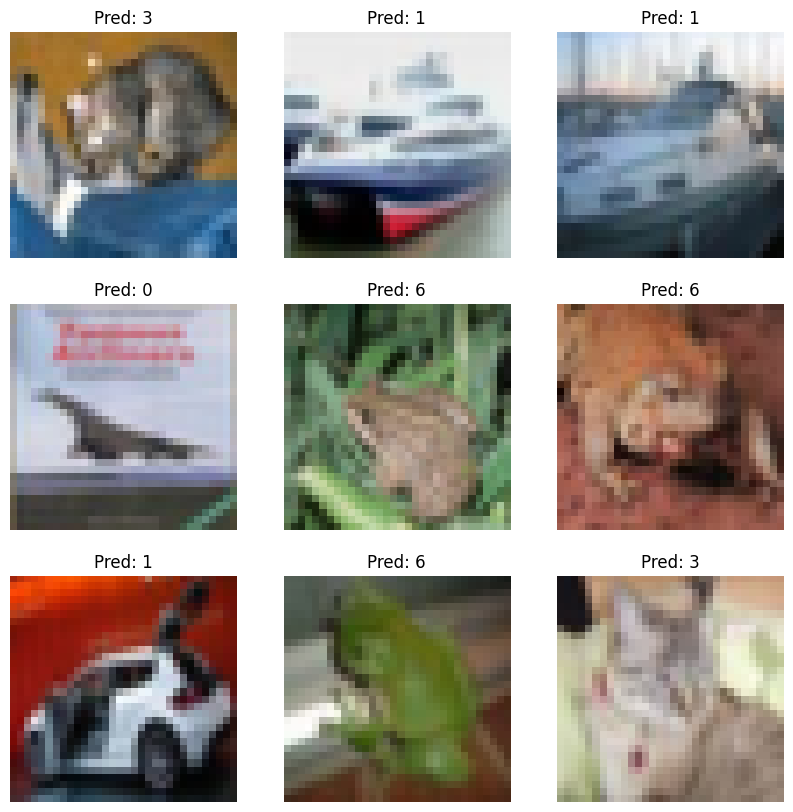

In [5]:
# Evaluate the trained model and visualize predictions
evaluate.evaluate()

## Next Steps and Integration

This notebook demonstrates a complete workflow from data loading, model building, training, and evaluation using best practices for modularity and reproducibility. 

### What You Can Do Next:

- **Containerization:** Use the provided `Dockerfile` to containerize this project for deployment.
- **CI/CD:** Integrate the CI pipeline using the `.github/workflows/ci.yml` file to automate testing and deployment.
- **Experiment Tracking:** Explore MLflow's UI to compare different runs and hyperparameters.
- **Enhancements:** Modify the model architecture, experiment with different data preprocessing techniques, or add additional modules as needed.

